In [3]:
from pandas_datareader import data
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
import pandas as pd
from datetime import date, timedelta, datetime
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import seaborn as sns

In [4]:
start_date = datetime.strptime('2018-08-31', "%Y-%m-%d")
end_date = datetime.strptime('2023-08-21', "%Y-%m-%d")

df = yf.download("AMAT", start = start_date, end = end_date)

df.reset_index(inplace=True)

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['50_day_ma'] = df['Close'].rolling(window=50).mean()
df['1000_day_ma'] = df['Close'].rolling(window=1000).mean()
df['10_day_vol_avg'] = df['Volume'].rolling(window=10).mean()
df['200_day_vol_avg'] = df['Volume'].rolling(window=200).mean()

#df = df.drop(df.iloc[0:365*26+210].index)

#df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', '50_day_ma', '1000_day_ma', '10_day_vol_avg', '200_day_vol_avg']]

df = df[['Date', 'Close']]

df_news = pd.read_csv('newsdata.csv')
df_social = pd.read_csv('socialdata.csv')

df.to_csv('AMAToutput.csv', index=False)

df['1'] = (df_news['1'] * (-4) + df_news['2'] * (-3) + df_news['3'] * (-2) + df_news['4'] * (-1) + df_news['5'] * 0 + df_news['6'] + df_news['7'] * 2 + df_news['8'] * 3 + df_news['9'] * 4) / 20
df['11'] = (df_social['1'] * (-4) + df_social['2'] * (-3) + df_social['3'] * (-2) + df_social['4'] * (-1) + df_social['5'] * 0 + df_social['6'] + df_social['7'] * 2 + df_social['8'] * 3 + df_social['9'] * 4) / 20

RelatedListNonIndex = ["TSM","INTC", "NVDA", "AMD", "MU"]   # companies Applied Materials supplies to
RelatedListIndex = ["SOXX", "^IXIC"] # aggregates: semi-conductors, tech

print(df)
print(df_news)

for element in RelatedListNonIndex:

  df_temp = yf.download(element, start=start_date, end=end_date)

  df_temp.reset_index(inplace=True)

  df_temp['Date'] = pd.to_datetime(df_temp['Date'], format='%d-%m-%Y')
  df_temp['50_day_ma'] = df_temp['Close'].rolling(window=50).mean()
  df_temp['200_day_ma'] = df_temp['Close'].rolling(window=200).mean()
  df_temp['10_day_vol_avg'] = df_temp['Volume'].rolling(window=10).mean()
  df_temp['90_day_vol_avg'] = df_temp['Volume'].rolling(window=90).mean()

  df_temp = df_temp[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '50_day_ma', '200_day_ma', '10_day_vol_avg', '90_day_vol_avg']]

  df[element + " Close"] = df_temp['Close']

for element in RelatedListIndex:

  df_temp = yf.download(element, start=start_date, end=end_date)

  df_temp.reset_index(inplace=True)

  df_temp['Date'] = pd.to_datetime(df_temp['Date'], format='%d-%m-%Y')
  df_temp['50_day_ma'] = df_temp['Close'].rolling(window=50).mean()
  df_temp['200_day_ma'] = df_temp['Close'].rolling(window=200).mean()
  df_temp['10_day_vol_avg'] = df_temp['Volume'].rolling(window=10).mean()
  df_temp['90_day_vol_avg'] = df_temp['Volume'].rolling(window=90).mean()

  df_temp = df_temp[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '50_day_ma', '200_day_ma', '10_day_vol_avg', '90_day_vol_avg']]

  df[element + " Close"] = df_temp['Close']
  #df_total[element + " Volume"] = df['Volume']

df.reset_index(inplace=True)

print(df)

[*********************100%%**********************]  1 of 1 completed
           Date       Close     1    11
0    2018-08-31   43.020000  0.05  0.10
1    2018-09-04   42.619999  0.00  0.35
2    2018-09-05   42.500000  0.50  0.35
3    2018-09-06   40.270000  0.20  0.00
4    2018-09-07   39.849998  1.75  0.00
...         ...         ...   ...   ...
1244 2023-08-14  141.889999  3.40  1.80
1245 2023-08-15  140.080002  2.90  1.75
1246 2023-08-16  138.250000  4.25  1.75
1247 2023-08-17  137.589996  4.65  2.25
1248 2023-08-18  142.660004  0.25  2.65

[1249 rows x 4 columns]
            Date  1  2  3  4   5  6   7   8  9
0     2018-08-31  0  0  0  0   3  1   0   0  0
1     2018-09-01  0  0  0  0   0  0   0   0  0
2     2018-09-02  0  0  0  0   0  0   5   0  0
3     2018-09-03  0  0  1  1   3  4   0   1  0
4     2018-09-04  0  0  0  0  24  3  13   2  0
...          ... .. .. .. ..  .. ..  ..  .. ..
1812  2023-08-17  0  0  4  0  20  5  10   1  1
1813  2023-08-18  0  4  6  1  16  2  17   6  3
181

<ipython-input-4-246f1105b4f1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['1'] = (df_news['1'] * (-4) + df_news['2'] * (-3) + df_news['3'] * (-2) + df_news['4'] * (-1) + df_news['5'] * 0 + df_news['6'] + df_news['7'] * 2 + df_news['8'] * 3 + df_news['9'] * 4) / 20
<ipython-input-4-246f1105b4f1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['11'] = (df_social['1'] * (-4) + df_social['2'] * (-3) + df_social['3'] * (-2) + df_social['4'] * (-1) + df_social['5'] * 0 + df_social['6'] + df_social[

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
      index       Date       Close     1    11  TSM Close  INTC Close  \
0         0 2018-08-31   43.020000  0.05  0.10  43.599998   48.430000   
1         1 2018-09-04   42.619999  0.00  0.35  44.110001   47.959999   
2         2 2018-09-05   42.500000  0.50  0.35  44.220001   47.720001   
3         3 2018-09-06   40.270000  0.20  0.00  44.049999   47.259998   
4         4 2018-09-07   39.849998  1.75  0.00  44.880001   46.450001   
...     ...        ...         ...   ...   ...        ...         ...   
1244  

In [5]:
df.set_index('Date', inplace=True)

df.dropna(inplace=True)

train_df = df.sort_values(by=['Date']).copy()

#FEATURES = ['Close', '50_day_ma', '200_day_ma']
FEATURES = df.columns.tolist()

print('FEATURE LIST')
print([f for f in FEATURES])

print(df)

data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

data_filtered_ext.tail()

nrows = data_filtered.shape[0]

np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

FEATURE LIST
['index', 'Close', '1', '11', 'TSM Close', 'INTC Close', 'NVDA Close', 'AMD Close', 'MU Close', 'SOXX Close', '^IXIC Close']
            index       Close     1    11  TSM Close  INTC Close  NVDA Close  \
Date                                                                           
2018-08-31      0   43.020000  0.05  0.10  43.599998   48.430000   70.169998   
2018-09-04      1   42.619999  0.00  0.35  44.110001   47.959999   70.925003   
2018-09-05      2   42.500000  0.50  0.35  44.220001   47.720001   69.605003   
2018-09-06      3   40.270000  0.20  0.00  44.049999   47.259998   68.180000   
2018-09-07      4   39.849998  1.75  0.00  44.880001   46.450001   67.964996   
...           ...         ...   ...   ...        ...         ...         ...   
2023-08-14   1244  141.889999  3.40  1.80  93.070000   35.680000  437.529999   
2023-08-15   1245  140.080002  2.90  1.75  91.680000   34.770000  439.399994   
2023-08-16   1246  138.250000  4.25  1.75  91.779999   33.5299

In [6]:
sequence_length = 100

index_Close = data_filtered.columns.get_loc("Close")

train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

In [7]:
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    print(index_Close)
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:])
        y.append(data[i, index_Close])

    x = np.array(x)
    y = np.array(y)
    return x, y

x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

model = Sequential()

n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

1
1
(900, 100, 11) (900,)
(249, 100, 11) (249,)
0.07035722756117527
0.07035722756117527
1100 100 11


In [8]:
model.compile(optimizer='adam', loss='mse')

epochs = 20
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience = 3, verbose=1)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[])

Epoch 1/20
57/57 [==============================] - 15s 102ms/step - loss: 0.1128 - val_loss: 0.0028
Epoch 2/20
57/57 [==============================] - 5s 91ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 3/20
57/57 [==============================] - 5s 91ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 4/20
57/57 [==============================] - 5s 90ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 5/20
57/57 [==============================] - 5s 90ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 6/20
57/57 [==============================] - 5s 90ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/20
57/57 [==============================] - 5s 91ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/20
57/57 [==============================] - 5s 91ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/20
57/57 [==============================] - 5s 92ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 10/20
57/57 [==============================] - 5s 91ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1

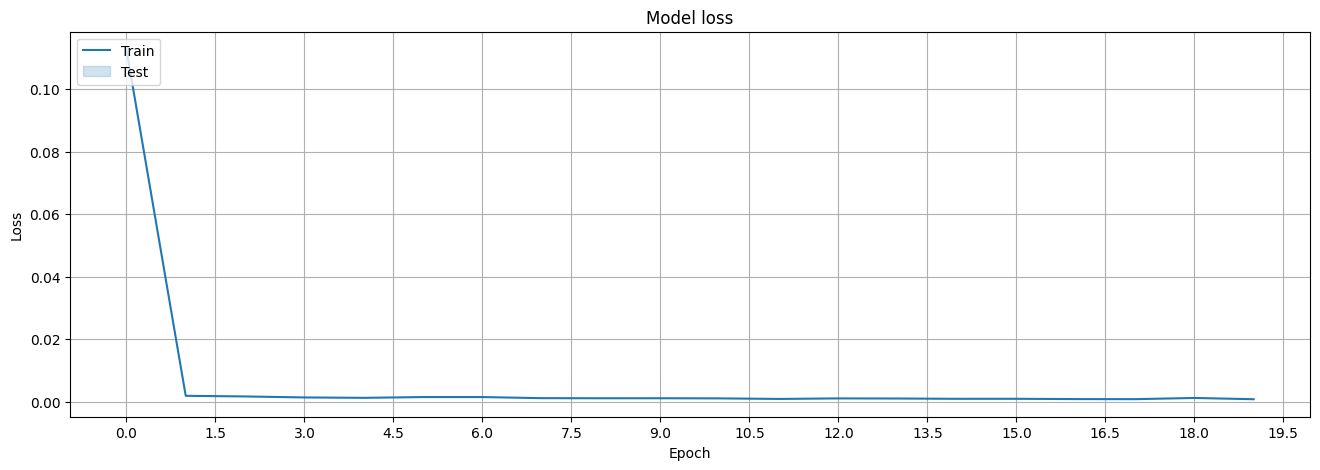

In [9]:
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

8/8 [==============================] - 1s 47ms/step
Accuracy: 0.464 %
Precision: 0.445 %
Recall: 0.479 %
F Score: 0.462 %


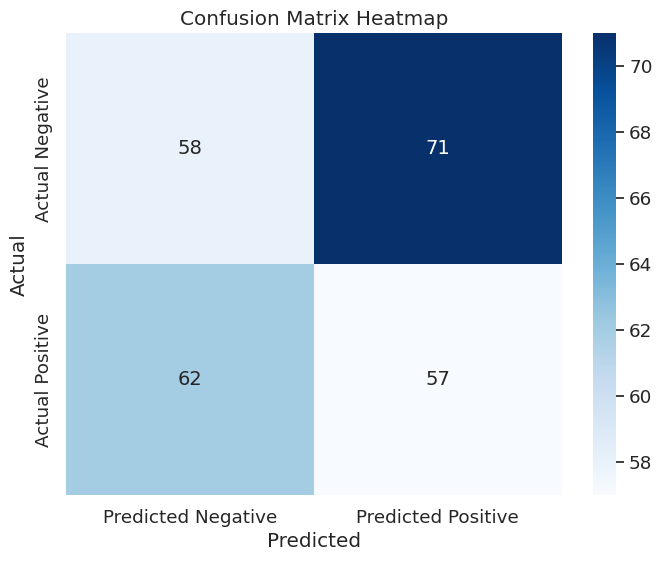

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_scaled = model.predict(x_test)

y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

y_pred_bin = []
y_test_bin = []

for i in range(1, len(y_pred)):
    if (y_pred[i] > y_pred[i-1]):
      y_pred_bin.append(1)
    else:
      y_pred_bin.append(-1)

for i in range(1, len(y_test_unscaled)):
    if (y_test_unscaled[i] > y_test_unscaled[i-1]):
      y_test_bin.append(1)
    else:
      y_test_bin.append(-1)

count_up = 0
count_down = 0
total_up = 0
total_down = 0
for i in range(len(y_pred_bin)):
  if (y_pred_bin[i] == y_test_bin[i]):
    if (y_pred_bin[i] == 1):
      count_up += 1
    else:
      count_down += 1
  if (y_test_bin[i] == 1):
    total_up += 1
  else:
    total_down += 1

accuracy = (count_up + count_down)/(total_up + total_down)
precision = count_up/(count_up + total_down - count_down)
recall = count_up/(total_up)
f_score = 2 * (precision*recall)/(precision + recall)

print(f'Accuracy: {np.round(accuracy, 3)} %')
print(f'Precision: {np.round(precision, 3)} %')
print(f'Recall: {np.round(recall, 3)} %')
print(f'F Score: {np.round(f_score, 3)} %')

cm = confusion_matrix(y_test_bin, y_pred_bin)

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, cbar=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

DatetimeIndex(['2018-08-31', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', name='Date', length=1250, freq=None)


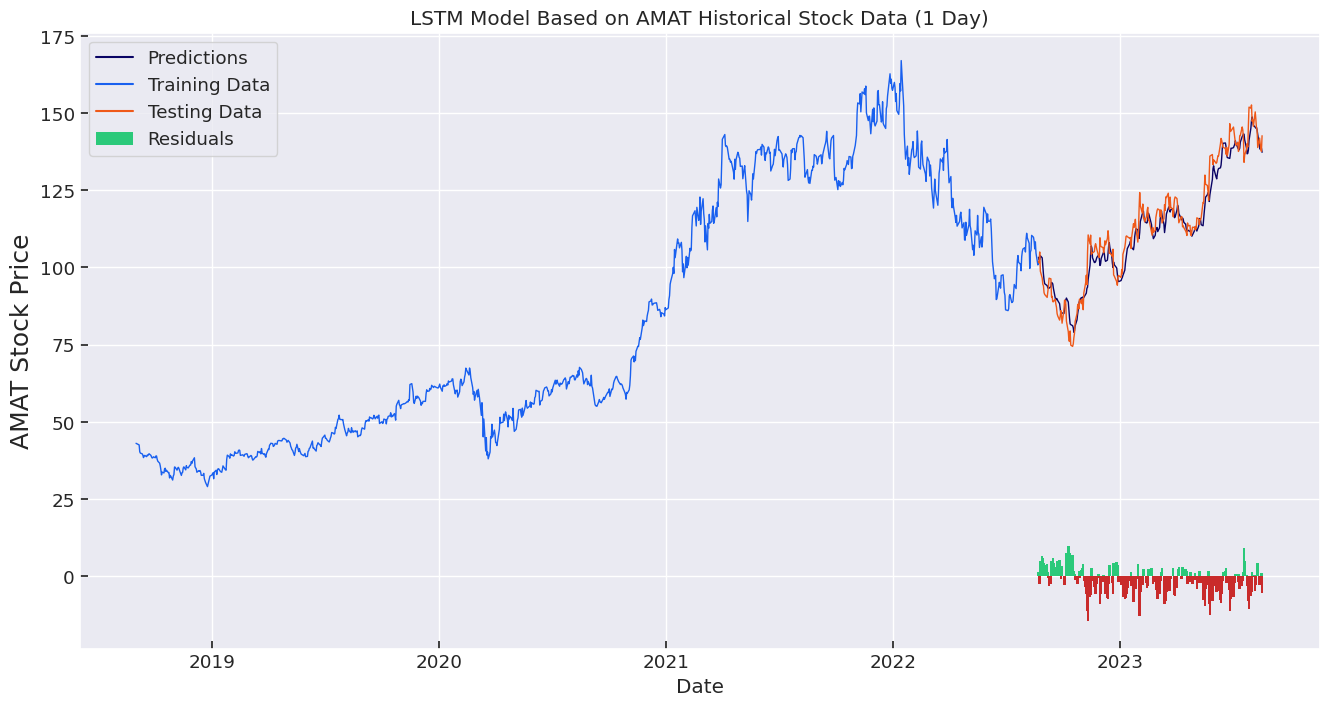

In [11]:
display_start_date = "2010-01-01"

train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'Training Data'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'Testing Data'})
valid.insert(1, "Predictions", y_pred, True)
valid.insert(1, "Residuals", valid["Predictions"] - valid["Testing Data"], True)
df_union = pd.concat([train, valid])

print(df_union.index)

df_union_zoom = df_union[df_union.index > display_start_date]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("LSTM Model Based on AMAT Historical Stock Data (1 Day)")
plt.ylabel("AMAT Stock Price", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['Predictions', 'Training Data', 'Testing Data']], linewidth=1.0, dashes=False, ax=ax1)

df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["Residuals"].dropna()]
ax1.bar(height=df_union_zoom['Residuals'].dropna(), x=df_union_zoom['Residuals'].dropna().index, width=4, label='Residuals', color=df_sub, edgecolor='none')
ax1.tick_params(which='both', direction='in', bottom=True, left=True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
plt.legend()
plt.show()

DatetimeIndex(['2018-08-31', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', name='Date', length=1250, freq=None)


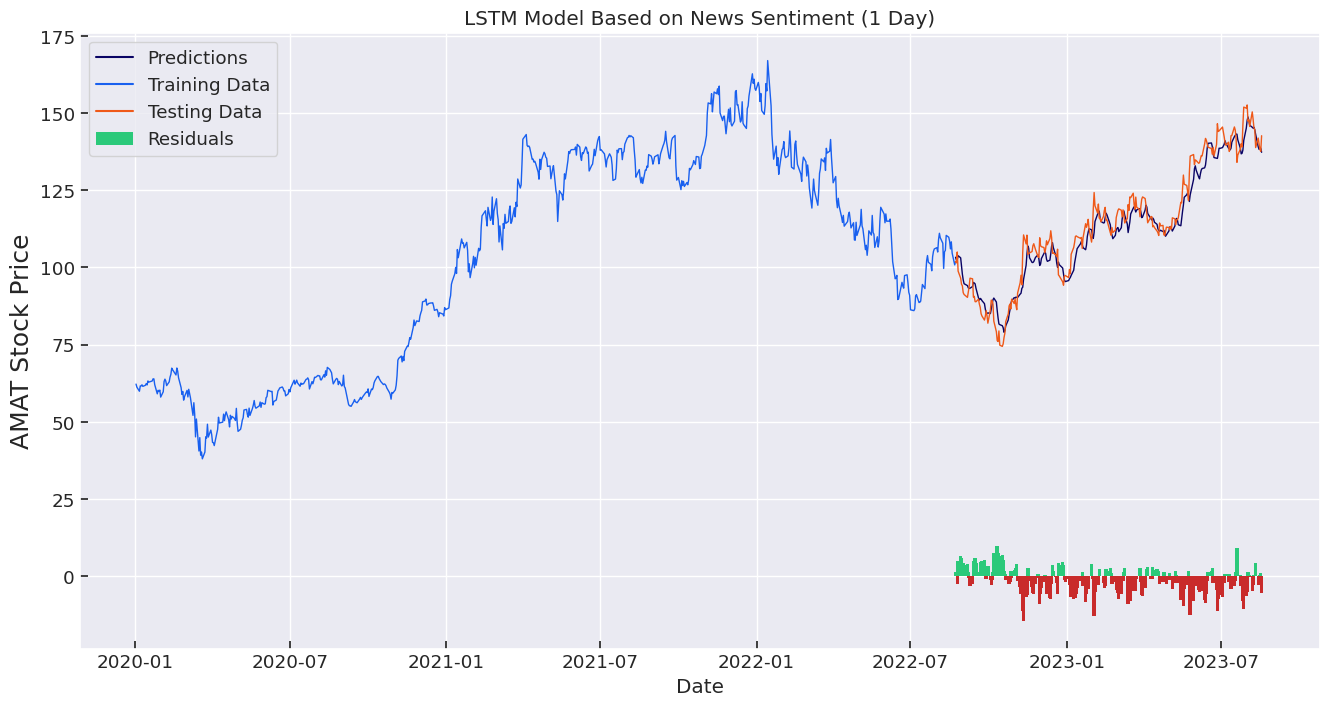

In [12]:
display_start_date = "2020-01-01"

train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'Training Data'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'Testing Data'})
valid.insert(1, "Predictions", y_pred, True)
valid.insert(1, "Residuals", valid["Predictions"] - valid["Testing Data"], True)
df_union = pd.concat([train, valid])

print(df_union.index)

df_union_zoom = df_union[df_union.index > display_start_date]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("LSTM Model Based on News Sentiment (1 Day)")
plt.ylabel("AMAT Stock Price", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['Predictions', 'Training Data', 'Testing Data']], linewidth=1.0, dashes=False, ax=ax1)

df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["Residuals"].dropna()]
ax1.bar(height=df_union_zoom['Residuals'].dropna(), x=df_union_zoom['Residuals'].dropna().index, width=4, label='Residuals', color=df_sub, edgecolor='none')
ax1.tick_params(which='both', direction='in', bottom=True, left=True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
plt.legend()
plt.show()

DatetimeIndex(['2018-08-31', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', name='Date', length=1250, freq=None)


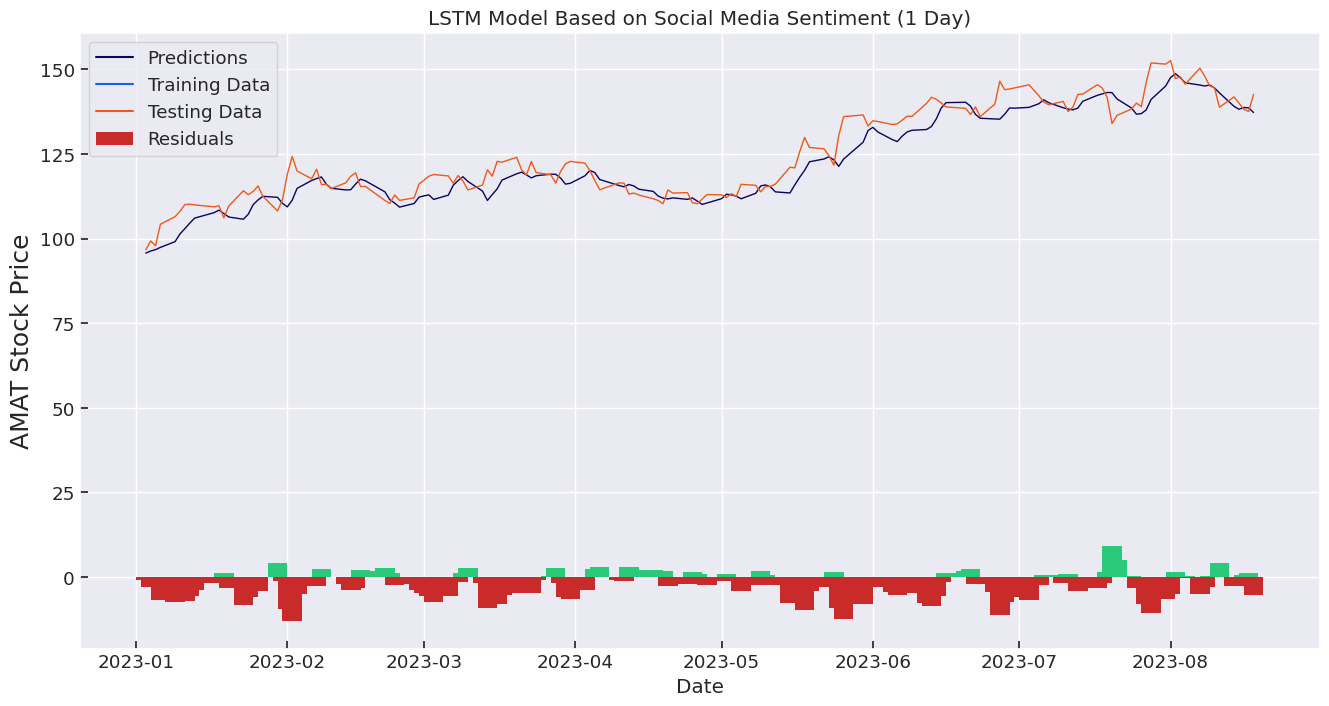

In [13]:
display_start_date = "2023-01-01"

train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'Training Data'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'Testing Data'})
valid.insert(1, "Predictions", y_pred, True)
valid.insert(1, "Residuals", valid["Predictions"] - valid["Testing Data"], True)
df_union = pd.concat([train, valid])

print(df_union.index)

df_union_zoom = df_union[df_union.index > display_start_date]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("LSTM Model Based on Social Media Sentiment (1 Day)")
plt.ylabel("AMAT Stock Price", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['Predictions', 'Training Data', 'Testing Data']], linewidth=1.0, dashes=False, ax=ax1)

df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["Residuals"].dropna()]
ax1.bar(height=df_union_zoom['Residuals'].dropna(), x=df_union_zoom['Residuals'].dropna().index, width=4, label='Residuals', color=df_sub, edgecolor='none')
ax1.tick_params(which='both', direction='in', bottom=True, left=True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
plt.legend()
plt.show()

In [14]:
df_temp = df[-sequence_length:]
new_df = df_temp.filter(FEATURES)

N = sequence_length

last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

X_test_new = []
X_test_new.append(last_N_days_scaled)

pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

price_today = np.round(new_df['Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''

print(f'The close price for {"AMAT"} at {str(dt.date.today())} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')


1/1 [==============================] - 0s 24ms/step
The close price for AMAT at 2023-08-24 was 142.66
The predicted close price is 137.1300048828125 (-4.03%)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Inverse transform predictions
train_predict = scaler_pred.inverse_transform(train_predict)
y_train = scaler_pred.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler_pred.inverse_transform(test_predict)
y_test = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mae_train = mean_absolute_error(y_train, train_predict)
mse_train = mean_squared_error(y_train, train_predict)
rmse_train = np.sqrt(mse_train)

mae_test = mean_absolute_error(y_test, test_predict)
mse_test = mean_squared_error(y_test, test_predict)
rmse_test = np.sqrt(mse_test)

print(f'Training MAE: {mae_train:.4f}')
print(f'Training MSE: {mse_train:.4f}')
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Testing MAE: {mae_test:.4f}')
print(f'Testing MSE: {mse_test:.4f}')
print(f'Testing RMSE: {rmse_test:.4f}')

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(y_test, test_predict)
print(f'Mean Absolute Percentage Error: {mape:.4f}')

r2 = r2_score(y_test, test_predict)
print(f"R-squared (R2): {r2:.4f}")

1
1
8/8 [==============================] - 0s 41ms/step
Training MAE: 2.4859
Training MSE: 11.6330
Training RMSE: 3.4107
Testing MAE: 3.5100
Testing MSE: 19.9950
Testing RMSE: 4.4716
Mean Absolute Percentage Error: 3.1558
R-squared (R2): 0.9456
